##### Required Modules

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install sklearn
# !pip install gdown
# !gdown https://drive.google.com/uc?id=1qDQEQd5oITChPGxbIZd_beO1-ZTTTFbN
# !pip install matplotlib
# !pip install seaborn
# !pip install mplfinance
# !pip install plotly
# !pip install nbformat
# !pip install pykrx
# !pip install pandas-datareader

You should consider upgrading via the 'C:\Users\wkddl\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\wkddl\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\wkddl\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\wkddl\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
Downloading...
From: https://drive.google.com/uc?id=1qDQEQd5oITChPGxbIZd_beO1-ZTTTFbN
To: c:\python\project_visualization\TA_Lib-0.4.24-cp39-cp39-win_amd64.whl

  0%|          | 0.00/516k [00:00<?, ?B/s]
100%|██████████| 516k/516k [00:00<00:00, 3.26MB/s]
100%|██████████| 516k/516k [00:00<00:00, 3.22MB/s]


You should consider upgrading via the 'C:\Users\wkddl\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\wkddl\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\wkddl\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\wkddl\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\wkddl\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\wkddl\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\wkddl\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


<br />
<br />
<br />
<br />

##### Module Importing and Aliasing

In [2]:
# Data Analysis and Visualization
import pandas                as pd
import numpy                 as np
from   sklearn.preprocessing import MinMaxScaler
# import talib

# Visualization
from   matplotlib           import font_manager, rc
import matplotlib.pyplot    as plt
import seaborn              as sns
import mplfinance           as mpf
import plotly.graph_objects as go
import plotly.subplots      as ms
import matplotlib as mpl
import matplotlib.pyplot as plt
# Time Handling
import time
from   pytz     import timezone
from   datetime import date, datetime, timedelta

# HTTP Requests
from urllib.request import urlopen
import urllib

# Data Sources
from   pykrx             import stock, bond
import pandas_datareader as pdr

# Configurations
import warnings

<br />
<br />
<br />
<br />

##### Configurations

In [3]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'SeoulNamsan'
plt.rcParams['font.family'] = 'SeoulNamsan' # 한글 폰트 설정 (서울 남산체)
print(mpl.rcParams['font.family'])

SeoulNamsan
NanumGothic
Nanum Pen
NanumGothic
NanumGothic
['SeoulNamsan']


In [4]:
plt.rcParams['axes.unicode_minus'] = False    # 마이너스 깨짐 방지
warnings.filterwarnings('ignore')             # 경고 무시

<br />
<br />
<br />
<br />

##### Constants

In [5]:
# Date Strings
YESTERDAY             = datetime.strftime(datetime.now(timezone('Asia/Seoul')) - timedelta(1)  , "%Y%m%d") # Yesterday (Format:"YYYYMMDD")
PREVIOUS_BUSINESS_DAY = datetime.strftime(datetime.now(timezone('Asia/Seoul')) - timedelta(3)  , "%Y%m%d") if datetime.now(timezone('Asia/Seoul')).weekday() == 0 else YESTERDAY # Previous Business Day (Format:"YYYYMMDD")
TODAY                 = datetime.strftime(datetime.now(timezone('Asia/Seoul'))                 , "%Y%m%d") # Yesterday (Format:"YYYYMMDD")
TOMORROW              = datetime.strftime(datetime.now(timezone('Asia/Seoul')) + timedelta(1)  , "%Y%m%d") # Yesterday (Format:"YYYYMMDD")
LAST_YEAR             = datetime.strftime(datetime.now(timezone('Asia/Seoul')) - timedelta(365), "%Y")     # Last year (Format:"YYYY")
CURRENT_YEAR          = datetime.strftime(datetime.now(timezone('Asia/Seoul'))                 , "%Y")     # Current year (Format:"YYYY")

# Tickers of World Indexes
WORLD_INDEX_TICKERS = [ {'ticker':'^GSPC',     'nation':'US',          'name':'S&P 500'},
                        {'ticker':'^DJI',      'nation':'US',          'name':'Dow Jones Industrial Average'},
                        {'ticker':'^IXIC',     'nation':'US',          'name':'NASDAQ Composite'},
                        # {'ticker':'^NYA',      'nation':'US',          'name':'NYSE COMPOSITE (DJ)'},
                        # {'ticker':'^XAX',      'nation':'US',          'name':'NYSE AMEX COMPOSITE INDEX'},
                        # {'ticker':'^BUK100P',  'nation':'UK',          'name':'Cboe UK 100'},
                        # {'ticker':'^RUT',      'nation':'US',          'name':'Russell 2000'},
                        # {'ticker':'^VIX',      'nation':'US',          'name':'Vix'},
                        {'ticker':'\^FTSE',    'nation':'UK',          'name':'FTSE 100'},
                        {'ticker':'^GDAXI',    'nation':'Germany',     'name':'DAX PERFORMANCE-INDEX'},
                        {'ticker':'^FCHI',     'nation':'France',      'name':'CAC 40'},
                        # {'ticker':'^STOXX50E', 'nation':'Europe',      'name':'ESTX 50 PR.EUR'},
                        # {'ticker':'^N100',     'nation':'France',      'name':'Euronext 100 Index'},
                        # {'ticker':'^BFX',      'nation':'Belgium',     'name':'BEL 20'},
                        # {'ticker':'IMOEX.ME',  'nation':'Russia',      'name':'MOEX Russia Index'},
                        {'ticker':'^N225',     'nation':'Japan',       'name':'Nikkei 225'},
                        # {'ticker':'^HSI',      'nation':'Taiwan',      'name':'HANG SENG INDEX'},
                        # {'ticker':'000001.SS', 'nation':'China',       'name':'SSE Composite Index'},
                        {'ticker':'399001.SZ', 'nation':'China',       'name':'Shenzhen Index'},
                        # {'ticker':'\^STI',     'nation':'Singapore',   'name':'STI Index'},
                        # {'ticker':'^AXJO',     'nation':'Australia',   'name':'S&P/ASX 200'},
                        # {'ticker':'^AORD',     'nation':'Australia',   'name':'ALL ORDINARIES'},
                        # {'ticker':'^BSESN',    'nation':'India',       'name':'S&P BSE SENSEX'},
                        # {'ticker':'^JKSE',     'nation':'Indonesia',   'name':'Jakarta Composite Index'},
                        # {'ticker':'\^KLSE',    'nation':'Malaysia',    'name':'FTSE Bursa Malaysia KLCI'},
                        # {'ticker':'^NZ50',     'nation':'New Zealand', 'name':'S&P/NZX 50 INDEX GROSS'},
                        {'ticker':'^KS11',     'nation':'Korea',       'name':'KOSPI Composite Index'},
                        # {'ticker':'^TWII',     'nation':'Taiwan',      'name':'TSEC weighted index'},
                        # {'ticker':'^GSPTSE',   'nation':'Canada',      'name':'S&P/TSX Composite index'},
                        # {'ticker':'^BVSP',     'nation':'Brazil',      'name':'IBOVESPA'},
                        # {'ticker':'^MXX',      'nation':'Mexico',      'name':'IPC MEXICO'},
                        # {'ticker':'^IPSA',     'nation':'Chile',       'name':'S&P/CLX IPSA'},
                        # {'ticker':'^MERV',     'nation':'Argentina',   'name':'MERVAL'},
                        # {'ticker':'^TA125.TA', 'nation':'Israel',      'name':'TA-125'},
                        # {'ticker':'^CASE30',   'nation':'Egypt',       'name':'EGX 30 Price Return Index'},
                        # {'ticker':'^JN0U.JO',  'nation':'Republic of South Africa', 'name':'Top 40 USD Net TRI Index'},
]

In [6]:
kospi_df = pd.read_csv('C:/python/data/kospi_data.csv')

In [7]:
kospi_df['Date']

0        1981-05-01
1        1981-05-02
2        1981-05-04
3        1981-05-06
4        1981-05-07
            ...    
11019    2022-08-25
11020    2022-08-26
11021    2022-08-29
11022    2022-08-30
11023    2022-08-31
Name: Date, Length: 11024, dtype: object

In [8]:
# csv 파일 불러오기
df_sector_month = pd.read_csv('https://drive.google.com/uc?id=1HAtL4rzsydW9vYvBSaH3cMj7j8ekRLqm',encoding='cp949').drop(columns='Unnamed: 0')
df_sector_year = pd.read_csv('https://drive.google.com/uc?id=1hmaEqDe_Wbak0zqgU7XB2mnbbPNJKn8T',encoding='cp949').drop(columns='Unnamed: 0')
df = pd.read_csv('https://drive.google.com/uc?id=1eJuZOdu2PTzzrMJvSXZn1vxN4edme_Dt', encoding='cp949').drop(columns='Unnamed: 0')
df_200 = pd.read_csv('https://drive.google.com/uc?id=1T8LxTflBcPpxUpi_GmicaNPk_8EL29ua', encoding = 'cp949').drop(columns='Unnamed: 0')

# 코스피 200 직접 불러오기
df_kospi_200 = stock.get_index_ohlcv("20181022", "20220901", "1028").reset_index()
temp = df_kospi_200.reset_index()
temp['sector_name'] = stock.get_index_ticker_name('1028')
temp['sector_ticker'] = '1028'
df_kospi_200 = temp[['sector_ticker','sector_name','날짜','시가','종가','고가','저가','거래량','거래대금',
                     '상장시가총액']]

# 칼럼명 영어로 변환
df_kospi_200.columns = ['sector_ticker','sector_name','date','open','close','high','low','volume','volume($)',
                     'Market_Cap']

# 날짜 타입 설정
df['date'] = df['date'].astype("datetime64")
df_200['date'] = df_200['date'].astype("datetime64")
df_kospi_200['date'] = df_kospi_200['date'].astype("datetime64")
df_sector_month['date'] = df_sector_month['date'].astype("datetime64")
df_sector_year['date'] = df_sector_year['date'].astype("datetime64")

# df 섹터별 구분하여 DF 생성
코스피 = df[df['sector_name']=='코스피']
음식료품 = df[df['sector_name']=='음식료품']
섬유의복 = df[df['sector_name']=='섬유의복']
종이목재 = df[df['sector_name']=='종이목재']
화학 = df[df['sector_name']=='화학']
의약품 = df[df['sector_name']=='의약품']
비금속광물 = df[df['sector_name']=='비금속광물']
철강금속 = df[df['sector_name']=='철강금속']
기계 = df[df['sector_name']=='기계']
전기전자 = df[df['sector_name']=='전기전자']
의료정밀 = df[df['sector_name']=='의료정밀']
운수장비 = df[df['sector_name']=='운수장비']
유통업 = df[df['sector_name']=='유통업']
전기가스업 = df[df['sector_name']=='전기가스업']
건설업 = df[df['sector_name']=='건설업']
운수창고업 = df[df['sector_name']=='운수창고업']
건설업 = df[df['sector_name']=='건설업']
통신업 = df[df['sector_name']=='통신업']
금융업 = df[df['sector_name']=='금융업']
은행 = df[df['sector_name']=='은행']
증권 = df[df['sector_name']=='증권']
보험 = df[df['sector_name']=='보험']
서비스업 = df[df['sector_name']=='서비스업']
제조업 = df[df['sector_name']=='제조업']

# 칼럼명 리스트 선언
sector_list=['코스피', '음식료품', '섬유의복', '종이목재', '화학', '의약품', '비금속광물', '철강금속', '기계',
       '전기전자', '의료정밀', '운수장비', '유통업', '전기가스업', '건설업', '운수창고업', '통신업',
       '금융업', '은행', '증권', '보험', '서비스업', '제조업']

x_list = [코스피, 음식료품, 섬유의복, 종이목재, 화학, 의약품, 비금속광물, 철강금속, 기계,
       전기전자, 의료정밀, 운수장비, 유통업, 전기가스업, 건설업, 운수창고업, 통신업,
       금융업, 은행, 증권, 보험, 서비스업, 제조업]

time_list = [df_sector_year,df_sector_month]

# df_200 섹터별 구분하여 DF 생성
커뮤니케이션서비스200 = df_200[df_200['sector_name']=='코스피 200 커뮤니케이션서비스']
건설200 = df_200[df_200['sector_name']=='코스피 200 건설']
중공업200 = df_200[df_200['sector_name']=='코스피 200 중공업']
철강소재200 = df_200[df_200['sector_name']=='코스피 200 철강/소재']
에너지화학200 = df_200[df_200['sector_name']=='코스피 200 에너지/화학']
정보기술200 = df_200[df_200['sector_name']=='코스피 200 정보기술']
금융200 = df_200[df_200['sector_name']=='코스피 200 금융']
생활소비재200 = df_200[df_200['sector_name']=='코스피 200 생활소비재']
경기소비재200 = df_200[df_200['sector_name']=='코스피 200 경기소비재']
산업재200 = df_200[df_200['sector_name']=='코스피 200 산업재']
헬스케어200 = df_200[df_200['sector_name']=='코스피 200 헬스케어']

# df_year, df_month 섹터별 구분하여 DF 생성
df_name_list=[]
for i in range(len(time_list)):
    for j in range(len(sector_list)):
        df_name_list.append(time_list[i][time_list[i]['sector_name']==sector_list[j]])
        
# 연도별 섹터별 분리
df_sector_year_코스피=df_name_list[0]
df_sector_year_음식료품=df_name_list[1] 
df_sector_year_섬유의복=df_name_list[2] 
df_sector_year_종이목재=df_name_list[3] 
df_sector_year_화학=df_name_list[4] 
df_sector_year_의약품=df_name_list[5] 
df_sector_year_비금속광물=df_name_list[6]
df_sector_year_철강금속=df_name_list[7] 
df_sector_year_기계=df_name_list[8] 
df_sector_year_전기전자=df_name_list[9] 
df_sector_year_의료정밀=df_name_list[10]
df_sector_year_운수장비=df_name_list[11] 
df_sector_year_유통업=df_name_list[12] 
df_sector_year_전기가스업=df_name_list[13] 
df_sector_year_건설업=df_name_list[14] 
df_sector_year_운수창고업=df_name_list[15] 
df_sector_year_통신업=df_name_list[16]
df_sector_year_금융업=df_name_list[17] 
df_sector_year_은행=df_name_list[18] 
df_sector_year_증권=df_name_list[19] 
df_sector_year_보험=df_name_list[20] 
df_sector_year_서비스업=df_name_list[21] 
df_sector_year_제조업=df_name_list[22]

# 월별 섹터별 분리
df_sector_month_코스피=df_name_list[23]
df_sector_month_음식료품=df_name_list[24]
df_sector_month_섬유의복=df_name_list[25]
df_sector_month_종이목재=df_name_list[26]
df_sector_month_화학=df_name_list[27] 
df_sector_month_의약품=df_name_list[28]
df_sector_month_비금속광물=df_name_list[29] 
df_sector_month_철강금속=df_name_list[30] 
df_sector_month_기계=df_name_list[31]
df_sector_month_전기전자=df_name_list[32]
df_sector_month_의료정밀=df_name_list[33] 
df_sector_month_운수장비=df_name_list[34]
df_sector_month_유통업=df_name_list[35] 
df_sector_month_전기가스업=df_name_list[36] 
df_sector_month_건설업=df_name_list[37] 
df_sector_month_운수창고업=df_name_list[38] 
df_sector_month_통신업=df_name_list[39] 
df_sector_month_금융업=df_name_list[40] 
df_sector_month_은행=df_name_list[41] 
df_sector_month_증권=df_name_list[42] 
df_sector_month_보험=df_name_list[43]
df_sector_month_서비스업=df_name_list[44] 
df_sector_month_제조업=df_name_list[45] 

# 연도별 index DF 선언
df_sector_year_코스피_index = (df_sector_year_코스피['Close'] / df_sector_year_코스피['Close'].iloc[0]) * 100
df_sector_year_음식료품_index = (df_sector_year_음식료품['Close'] / df_sector_year_음식료품['Close'].iloc[0]) * 100
df_sector_year_섬유의복_index = (df_sector_year_섬유의복['Close'] / df_sector_year_섬유의복['Close'].iloc[0]) * 100
df_sector_year_종이목재_index = (df_sector_year_종이목재['Close'] / df_sector_year_종이목재['Close'].iloc[0]) * 100
df_sector_year_화학_index = (df_sector_year_화학['Close'] / df_sector_year_화학['Close'].iloc[0]) * 100
df_sector_year_의약품_index = (df_sector_year_의약품['Close'] / df_sector_year_의약품['Close'].iloc[0]) * 100
df_sector_year_비금속광물_index = (df_sector_year_비금속광물['Close'] / df_sector_year_비금속광물['Close'].iloc[0]) * 100
df_sector_year_철강금속_index = (df_sector_year_철강금속['Close'] / df_sector_year_철강금속['Close'].iloc[0]) * 100
df_sector_year_기계_index = (df_sector_year_기계['Close'] / df_sector_year_기계['Close'].iloc[0]) * 100
df_sector_year_전기전자_index = (df_sector_year_전기전자['Close'] / df_sector_year_전기전자['Close'].iloc[0]) * 100
df_sector_year_의료정밀_index = (df_sector_year_의료정밀['Close'] / df_sector_year_의료정밀['Close'].iloc[0]) * 100
df_sector_year_운수장비_index = (df_sector_year_운수장비['Close'] / df_sector_year_운수장비['Close'].iloc[0]) * 100
df_sector_year_유통업_index = (df_sector_year_유통업['Close'] / df_sector_year_유통업['Close'].iloc[0]) * 100
df_sector_year_전기가스업_index = (df_sector_year_전기가스업['Close'] / df_sector_year_전기가스업['Close'].iloc[0]) * 100
df_sector_year_건설업_index = (df_sector_year_건설업['Close'] / df_sector_year_건설업['Close'].iloc[0]) * 100
df_sector_year_운수창고업_index = (df_sector_year_운수창고업['Close'] / df_sector_year_운수창고업['Close'].iloc[0]) * 100
df_sector_year_통신업_index = (df_sector_year_통신업['Close'] / df_sector_year_통신업['Close'].iloc[0]) * 100
df_sector_year_금융업_index = (df_sector_year_금융업['Close'] / df_sector_year_금융업['Close'].iloc[0]) * 100
df_sector_year_은행_index = (df_sector_year_은행['Close'] / df_sector_year_은행['Close'].iloc[0]) * 100
df_sector_year_증권_index = (df_sector_year_증권['Close'] / df_sector_year_증권['Close'].iloc[0]) * 100
df_sector_year_보험_index = (df_sector_year_보험['Close'] / df_sector_year_보험['Close'].iloc[0]) * 100
df_sector_year_서비스업_index = (df_sector_year_서비스업['Close'] / df_sector_year_서비스업['Close'].iloc[0]) * 100
df_sector_year_제조업_index = (df_sector_year_제조업['Close'] / df_sector_year_제조업['Close'].iloc[0]) * 100

# 월별 index DF 선언
df_sector_month_코스피_index = (df_sector_month_코스피['Close'] / df_sector_month_코스피['Close'].iloc[0]) * 100
df_sector_month_음식료품_index = (df_sector_month_음식료품['Close'] / df_sector_month_음식료품['Close'].iloc[0]) * 100
df_sector_month_섬유의복_index = (df_sector_month_섬유의복['Close'] / df_sector_month_섬유의복['Close'].iloc[0]) * 100
df_sector_month_종이목재_index = (df_sector_month_종이목재['Close'] / df_sector_month_종이목재['Close'].iloc[0]) * 100
df_sector_month_화학_index = (df_sector_month_화학['Close'] / df_sector_month_화학['Close'].iloc[0]) * 100
df_sector_month_의약품_index = (df_sector_month_의약품['Close'] / df_sector_month_의약품['Close'].iloc[0]) * 100
df_sector_month_비금속광물_index = (df_sector_month_비금속광물['Close'] / df_sector_month_비금속광물['Close'].iloc[0]) * 100
df_sector_month_철강금속_index = (df_sector_month_철강금속['Close'] / df_sector_month_철강금속['Close'].iloc[0]) * 100
df_sector_month_기계_index = (df_sector_month_기계['Close'] / df_sector_month_기계['Close'].iloc[0]) * 100
df_sector_month_전기전자_index = (df_sector_month_전기전자['Close'] / df_sector_month_전기전자['Close'].iloc[0]) * 100
df_sector_month_의료정밀_index = (df_sector_month_의료정밀['Close'] / df_sector_month_의료정밀['Close'].iloc[0]) * 100
df_sector_month_운수장비_index = (df_sector_month_운수장비['Close'] / df_sector_month_운수장비['Close'].iloc[0]) * 100
df_sector_month_유통업_index = (df_sector_month_유통업['Close'] / df_sector_month_유통업['Close'].iloc[0]) * 100
df_sector_month_전기가스업_index = (df_sector_month_전기가스업['Close'] / df_sector_month_전기가스업['Close'].iloc[0]) * 100
df_sector_month_건설업_index = (df_sector_month_건설업['Close'] / df_sector_month_건설업['Close'].iloc[0]) * 100
df_sector_month_운수창고업_index = (df_sector_month_운수창고업['Close'] / df_sector_month_운수창고업['Close'].iloc[0]) * 100
df_sector_month_통신업_index = (df_sector_month_통신업['Close'] / df_sector_month_통신업['Close'].iloc[0]) * 100
df_sector_month_금융업_index = (df_sector_month_금융업['Close'] / df_sector_month_금융업['Close'].iloc[0]) * 100
df_sector_month_은행_index = (df_sector_month_은행['Close'] / df_sector_month_은행['Close'].iloc[0]) * 100
df_sector_month_증권_index = (df_sector_month_증권['Close'] / df_sector_month_증권['Close'].iloc[0]) * 100
df_sector_month_보험_index = (df_sector_month_보험['Close'] / df_sector_month_보험['Close'].iloc[0]) * 100
df_sector_month_서비스업_index = (df_sector_month_서비스업['Close'] / df_sector_month_서비스업['Close'].iloc[0]) * 100
df_sector_month_제조업_index = (df_sector_month_제조업['Close'] / df_sector_month_제조업['Close'].iloc[0]) * 100

In [9]:
def set_date(df_stock, buy, sell):
    """
    문자열 형식의 구매 날짜와 판매 날짜를 입력 받아 해당 기간의 데이터만을 가진 DataFrame을 반환한다.
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : 조회하고자 하는 데이터가 담긴 DataFrame
    buy      (str)                         : 매수일
    sell     (str)                         : 매도일
    [Returns]
    pandas.core.frame.DataFrame : 해당 기간의 데이터만을 가진 DataFrame
    """
    buy = datetime.strptime(buy,'%Y-%m-%d')
    sell = datetime.strptime(sell,'%Y-%m-%d')
    cond1 = df_stock['date'] >= buy
    cond2 = df_stock['date'] <= sell
    return df_stock.loc[cond1 & cond2]
def get_mdd(df_stock, start, end):
    """
    특정 종목을 DataFrame형식으로 받아 mdd를 반환한다.
    
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : mdd를 구하고자 하는 특정종목의 DataFrame
    start    (str)                         : 시작 날짜
    end      (str)                         : 종료 날짜
    
    [Returns]
    float64 : mdd 값
    """
    
    x_mdd = set_date(df_stock,start,end)
    저가 = x_mdd['low'].min() #최저점
    index = x_mdd[x_mdd['low'] == x_mdd['low'].min()].index

    # 저가 기준 전고점 구하기
    전고점기간 = x_mdd.loc[:index[0], :]
    전고점 = 전고점기간['high'].max()

    # MDD 계산
    mdd = round((저가 - 전고점) / 전고점, 4) * 100
    
    return mdd

def get_mdd_5(df_stock):
    """
    특정 종목을 DataFrame형식으로 받아 2017-09-01 ~ 2022-09-01 5년간의 mdd를 반환한다.
    
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : mdd를 구하고자 하는 특정종목의 DataFrame
    
    [Returns]
    float64 : 5년 간의 mdd 값
    """

    return get_mdd(df_stock, '2017-09-01', '2022-09-01')

def get_mdd_10(df_stock):
    """
    특정 종목을 DataFrame형식으로 받아 2012-09-01 ~ 2022-09-01 10년간의 mdd를 반환한다.
    
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : mdd를 구하고자 하는 특정종목의 DataFrame
    
    [Returns]
    float64 : 10년 간의 mdd 값
    """

    return get_mdd(df_stock, '2012-09-01', '2022-09-01') 

def get_mdd_200(df_stock):
    """
    특정 종목을 DataFrame형식으로 받아 2018-10-22 ~ 2022-09-01 200주 간의 mdd를 반환한다.
    
    [Parameters]
    df_stock (pandas.core.frame.DataFrame) : mdd를 구하고자 하는 특정종목의 DataFrame
    
    [Returns]
    float64 : 2018-10-22 ~ 2022-09-01 200주 간의 mdd 값
    """

    return get_mdd(df_stock, '2018-10-22', '2022-09-01') 

In [10]:
sec = [코스피, 음식료품, 섬유의복, 종이목재, 화학, 의약품, 비금속광물, 철강금속, 기계,
       전기전자, 의료정밀, 운수장비, 유통업, 전기가스업, 건설업, 운수창고업, 통신업,
       금융업, 은행, 증권, 보험, 서비스업, 제조업]
sec_name_5 = ['코스피_5', '음식료품_5', '섬유의복_5', '종이목재_5', '화학_5', '의약품_5', '비금속광물_5', '철강금속_5', '기계_5',
       '전기전자_5', '의료정밀_5', '운수장비_5', '유통업_5', '전기가스업_5', '건설업_5', '운수창고업_5', '통신업_5',
       '금융업_5', '은행_5', '증권_5', '보험_5', '서비스업_5', '제조업_5']

sec_5_dict = {}

for idx, name in enumerate(sec):
    sec_5_dict[sec_name_5[idx]] = round(get_mdd_5(name),3)

sec_name_10 = ['코스피_10', '음식료품_10', '섬유의복_10', '종이목재_10', '화학_10', '의약품_10', '비금속광물_10', '철강금속_10', '기계_10',
       '전기전자_10', '의료정밀_10', '운수장비_10', '유통업_10', '전기가스업_10', '건설업_10', '운수창고업_10', '통신업_10',
       '금융업_10', '은행_10', '증권_10', '보험_10', '서비스업_10', '제조업_10']

sec_10_dict = {}

for idx, name in enumerate(sec):
    sec_10_dict[sec_name_10[idx]] = round(get_mdd_10(name),3)

df_mdd_5 = pd.DataFrame(data = sec_5_dict.values(), index = sec_5_dict.keys(), columns = ['MDD_5'])
df_mdd_10 = pd.DataFrame(data = sec_10_dict.values(), index = sec_10_dict.keys(), columns = ['MDD_10'])
df_mdd_5_modified = df_mdd_5 + 44.79
df_mdd_5_modified = df_mdd_5_modified.sort_values(by=['MDD_5'])

sec_200 = [커뮤니케이션서비스200,건설200,중공업200,철강소재200,에너지화학200,정보기술200,금융200,생활소비재200,경기소비재200,산업재200,헬스케어200]
sec_200_name = ['코스피 200 커뮤니케이션서비스', '코스피 200 건설', '코스피 200 중공업', '코스피 200 철강/소재',
       '코스피 200 에너지/화학', '코스피 200 정보기술', '코스피 200 금융', '코스피 200 생활소비재',
       '코스피 200 경기소비재', '코스피 200 산업재', '코스피 200 헬스케어']

sec_200_dict={}
for idx, name in enumerate(sec_200):
    sec_200_dict[sec_200_name[idx]] = round(get_mdd_200(name),3)
sec_200_dict['코스피 200'] = round(get_mdd_200(df_kospi_200),3)
df_mdd_200 = pd.DataFrame(data = sec_200_dict.values(), index = sec_200_dict.keys(), columns = ['MDD_200'])
df_mdd_200_modified = df_mdd_200 + 36.18
df_mdd_200_modified = df_mdd_200_modified.sort_values(by=['MDD_200'])

df_mdd_10_modified = df_mdd_10 + 44.79

In [11]:
df_mdd_200 = pd.DataFrame(data = sec_200_dict.values(), index = sec_200_dict.keys(), columns = ['MDD_200'])
df_mdd_200_modified = df_mdd_200 + 36.18
df_mdd_200_modified = df_mdd_200_modified.sort_values(by=['MDD_200'])

- 2022년 9월1일 기준 5년 전까지의 MDD를 살펴본 결과 KOSPI 지수의 MDDsms -44.79% 였다.  
<br />
- 이에 대비하여 제조업, 서비스업, 전기전자는 더 낮은 MDD를 보여줬고  
통신업을 제외하면 모두 코스피 지수보다 큰 낙폭을 보였다.  
<br />
- 우량 기업이 다수 포함되어 있는 전기전자 업종이 변동성이 심했던 코로나 장에서 상대적으로 잘 버텼음을 알 수 있다.  
<br />
<br />
<br />
<br />

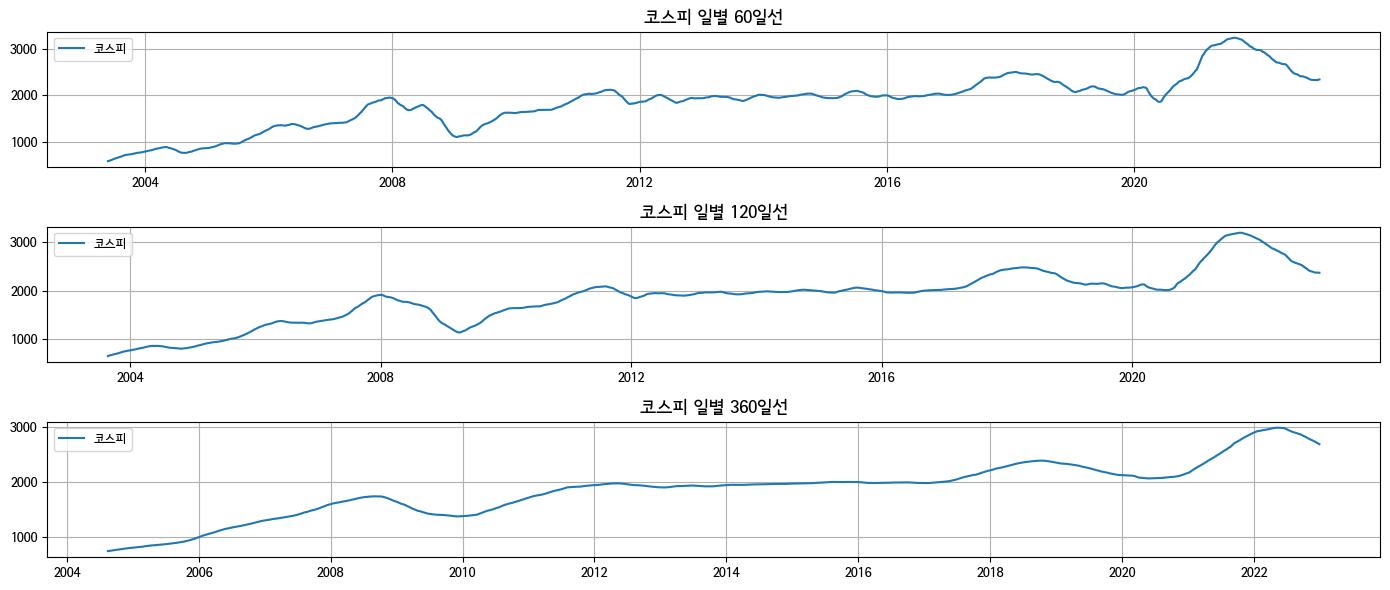

''

In [12]:
''' 데이터 불러오기 '''
# # ticker명 찾기
# tmp = []
# for ticker in stock.get_index_ticker_list():
#     tmp.append([ticker, stock.get_index_ticker_name(ticker)])

kospi = []
for i in ['1001','1002', '1003', '1004']:
    kospi.append(stock.get_index_ohlcv("20030301", "20230101", i))
total, big, middle, small = kospi

''''''

''' 시각화 시작 '''

# 60일 기준 이동 평균선
sixty_ma = []
for ksp in kospi:
    sixty_ma.append(ksp['종가'].rolling(window=60).mean()) 
total, big, middle, small = sixty_ma

fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(3, 1, 1)


ax1.plot(total, label='코스피')

plt.legend(loc = 'upper left', fontsize = 9)
plt.title('코스피 일별 60일선', fontdict = {'fontsize' : 13})
plt.grid()

# 120일 기준 이동 평균선
sixty_ma = []
for ksp in kospi:
    sixty_ma.append(ksp['종가'].rolling(window=120).mean()) 
total, big, middle, small = sixty_ma

ax2 = fig.add_subplot(3, 1, 2)

ax2.plot(total, label='코스피')
plt.legend(loc = 'upper left', fontsize = 9)
plt.title('코스피 일별 120일선', fontdict = {'fontsize' : 13})
plt.grid()

# 360일 기준 이동 평균선
sixty_ma = []
for ksp in kospi:
    sixty_ma.append(ksp['종가'].rolling(window=360).mean()) 
total, big, middle, small = sixty_ma

ax2 = fig.add_subplot(3, 1, 3)

ax2.plot(total, label='코스피')
plt.legend(loc = 'upper left', fontsize = 9)
plt.title('코스피 일별 360일선', fontdict = {'fontsize' : 13})
plt.grid()

plt.tight_layout()
plt.show()

''''''

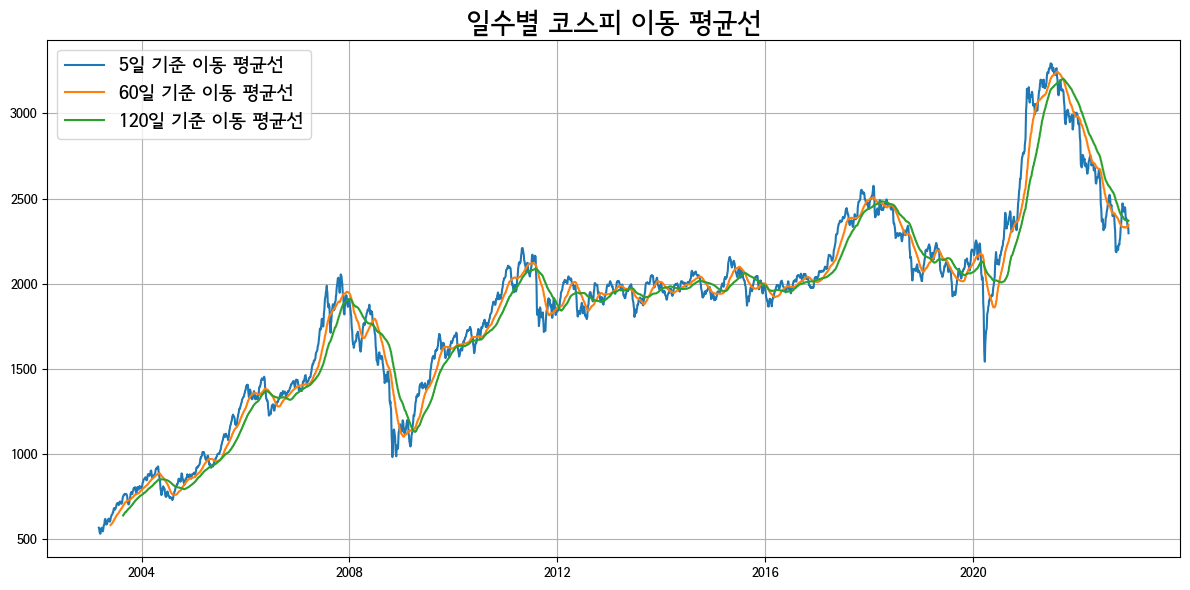

''

In [13]:
''' 데이터 불러오기 '''
# # ticker명 찾기
# tmp = []
# for ticker in stock.get_index_ticker_list():
#     tmp.append([ticker, stock.get_index_ticker_name(ticker)])

kospi = []

for i in ['1001','1002', '1003', '1004']:
    kospi.append(stock.get_index_ohlcv("20030301", "20230101", i))
total = kospi

''''''

''' 시각화 시작 '''
fig = plt.figure(figsize=(12, 6))

# 5일 기준 이동 평균선
sixty_ma = []
for ksp in kospi:
    sixty_ma.append(ksp['종가'].rolling(window=5).mean()) 
total, big, middle, small = sixty_ma
plt.plot(total,label='5일 기준 이동 평균선')

# 60일 기준 이동 평균선
sixty_ma = []
for ksp in kospi:
    sixty_ma.append(ksp['종가'].rolling(window=60).mean()) 
total, big, middle, small = sixty_ma
plt.plot(total, label='60일 기준 이동 평균선')

# 120일 기준 이동 평균선
sixty_ma = []
for ksp in kospi:
    sixty_ma.append(ksp['종가'].rolling(window=120).mean()) 
total, big, middle, small = sixty_ma
plt.plot(total,label='120일 기준 이동 평균선')

# # 240일 기준 이동 평균선
# sixty_ma = []
# for ksp in kospi:
#     sixty_ma.append(ksp['종가'].rolling(window=240).mean()) 
# total, big, middle, small = sixty_ma
# plt.plot(total, label='240일 기준 이동 평균선')

# # 360일 기준 이동 평균선
# sixty_ma = []
# for ksp in kospi:
#     sixty_ma.append(ksp['종가'].rolling(window=360).mean()) 
# total, big, middle, small = sixty_ma
# plt.plot(total, label='360일 기준 이동 평균선')

plt.legend(loc = 'upper left', fontsize = 14)
plt.title('일수별 코스피 이동 평균선', fontdict = {'fontsize' : 20})
plt.grid(True)

plt.tight_layout()
plt.show()

''''''

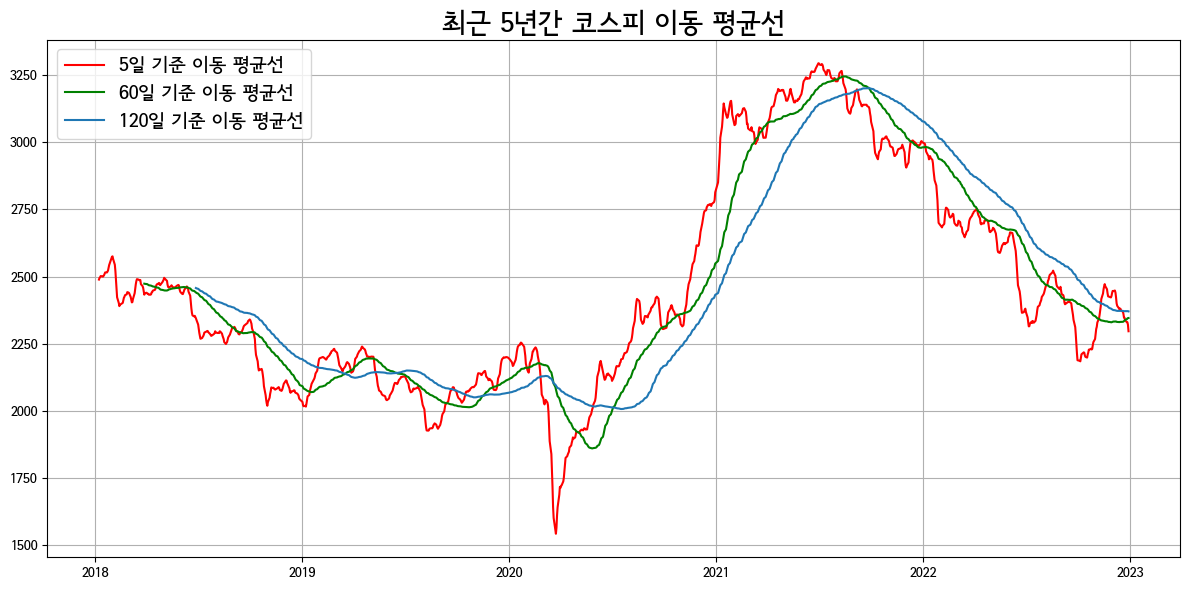

''

In [14]:
''' 데이터 불러오기 '''
# # ticker명 찾기
# tmp = []
# for ticker in stock.get_index_ticker_list():
#     tmp.append([ticker, stock.get_index_ticker_name(ticker)])

kospi = []

for i in ['1001','1002', '1003', '1004']:
    kospi.append(stock.get_index_ohlcv("20180101", "20230101", i))
total = kospi

''''''

''' 시각화 시작 '''
fig = plt.figure(figsize=(12, 6))

# 5일 기준 이동 평균선
sixty_ma = []
for ksp in kospi:
    sixty_ma.append(ksp['종가'].rolling(window=5).mean()) 
total, big, middle, small = sixty_ma
plt.plot(total, 'r',label='5일 기준 이동 평균선')

# 60일 기준 이동 평균선
sixty_ma = []
for ksp in kospi:
    sixty_ma.append(ksp['종가'].rolling(window=60).mean()) 
total, big, middle, small = sixty_ma
plt.plot(total, 'g',label='60일 기준 이동 평균선')

# 120일 기준 이동 평균선
sixty_ma = []
for ksp in kospi:
    sixty_ma.append(ksp['종가'].rolling(window=120).mean()) 
total, big, middle, small = sixty_ma
plt.plot(total, label='120일 기준 이동 평균선')

# # 240일 기준 이동 평균선
# sixty_ma = []
# for ksp in kospi:
#     sixty_ma.append(ksp['종가'].rolling(window=240).mean()) 
# total, big, middle, small = sixty_ma
# plt.plot(total, label='240일 기준 이동 평균선')

# # 360일 기준 이동 평균선
# sixty_ma = []
# for ksp in kospi:
#     sixty_ma.append(ksp['종가'].rolling(window=360).mean()) 
# total, big, middle, small = sixty_ma
# plt.plot(total, label='360일 기준 이동 평균선')

plt.legend(loc = 'upper left', fontsize = 14)
plt.title('최근 5년간 코스피 이동 평균선', fontdict = {'fontsize' : 20})

plt.grid(True)
plt.tight_layout()
plt.show()

''''''